# Exploratory Data Analysis

**Our EDA uncovered key patterns across demographics, customer behavior, and product lifecycle. These insights are crucial for driving retention, personalized marketing, and product cross-sell strategies.**

In [8]:
import dask.dataframe as dd
import numpy as np

In [9]:
dtypes = {
    'age': 'float64',
    'antiguedad': 'float64',
    'renta': 'float64',
    'indrel_1mes': 'object',
    'conyuemp': 'object',
    'ult_fec_cli_1t': 'object',
    'tiprel_1mes': 'object',
    'canal_entrada': 'object',
    'segmento': 'object'
}

df = dd.read_csv("Final_cleaned.csv", dtype=dtypes, low_memory=False)

In [10]:
# Renaming for all relevant columns
full_column_rename = {
    # Personal & Demographic
    'fecha_dato': 'date',
    'ncodpers': 'customer_id',
    'ind_empleado': 'employee_index',
    'pais_residencia': 'country_of_residence',
    'sexo': 'gender',
    'age': 'age',
    'fecha_alta': 'customer_join_date',
    'ind_nuevo': 'new_customer_index',
    'antiguedad': 'customer_seniority',
    'indrel': 'primary_customer_index',
    'ult_fec_cli_1t': 'last_date_as_primary',
    'indrel_1mes': 'customer_type_code',
    'tiprel_1mes': 'customer_relation_type',
    'indresi': 'residence_index',
    'indext': 'foreigner_index',
    'conyuemp': 'spouse_index',
    'canal_entrada': 'joining_channel',
    'indfall': 'deceased_index',
    'tipodom': 'address_type',
    'cod_prov': 'province_code',
    'nomprov': 'province_name',
    'ind_actividad_cliente': 'active_customer_index',
    'renta': 'household_income',
    'segmento': 'customer_segment',

    # Product Ownership
    'ind_ahor_fin_ult1': 'savings_account',
    'ind_aval_fin_ult1': 'guarantees',
    'ind_cco_fin_ult1': 'current_account',
    'ind_cder_fin_ult1': 'derivada_account',
    'ind_cno_fin_ult1': 'payroll_account',
    'ind_ctju_fin_ult1': 'junior_account',
    'ind_ctma_fin_ult1': 'mas_particular_account',
    'ind_ctop_fin_ult1': 'particular_account',
    'ind_ctpp_fin_ult1': 'particular_plus_account',
    'ind_deco_fin_ult1': 'short_term_deposit',
    'ind_deme_fin_ult1': 'medium_term_deposit',
    'ind_dela_fin_ult1': 'long_term_deposit',
    'ind_ecue_fin_ult1': 'e_account',
    'ind_fond_fin_ult1': 'funds',
    'ind_hip_fin_ult1': 'mortgage',
    'ind_plan_fin_ult1': 'pensions',
    'ind_pres_fin_ult1': 'loans',
    'ind_reca_fin_ult1': 'taxes',
    'ind_tjcr_fin_ult1': 'credit_card',
    'ind_valo_fin_ult1': 'securities',
    'ind_viv_fin_ult1': 'home_account',
    'ind_nomina_ult1': 'salary',
    'ind_nom_pens_ult1': 'pension',
    'ind_recibo_ult1': 'direct_debit'
}

df = df.rename(columns=full_column_rename) #Applying renames to columns for better readability

df['gender'] = df['gender'].replace({'H': 'Male', 'V': 'Female'}) # "H" - Hombre - Male and "V" - Mujer/Varón - Female

# 1: Customer Profile Analysis

In [4]:
# Gender distribution
print("\n--- Gender Distribution ---")
print(df['gender'].value_counts().compute())

# Age distribution
print("\n--- Age Summary ---")
print(df['age'].describe().compute())

# Customer Segment distribution
print("\n--- Customer Segment Distribution ---")
print(df['customer_segment'].value_counts().compute())

# Country of residence
print("\n--- Top 10 Countries by Customer Count ---")
print(df['country_of_residence'].value_counts().nlargest(10).compute())

# Customer seniority (in months)
print("\n--- Customer Seniority Summary ---")
print(df['customer_seniority'].describe().compute())


--- Gender Distribution ---
gender
Female    7424252
Male      6195253
Name: count, dtype: int64[pyarrow]

--- Age Summary ---
count    1.364731e+07
mean     4.024009e+01
std      1.707727e+01
min      1.800000e+01
25%      2.900000e+01
50%      4.400000e+01
75%      6.100000e+01
max      1.000000e+02
Name: age, dtype: float64

--- Customer Segment Distribution ---
customer_segment
02 - PARTICULARES     8149588
03 - UNIVERSITARIO    4935579
01 - TOP               562142
Name: count, dtype: int64[pyarrow]

--- Top 10 Countries by Customer Count ---
country_of_residence
ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
US        3651
CO        3526
IT        2947
RO        2931
MX        2573
Name: count, dtype: int64[pyarrow]

--- Customer Seniority Summary ---
count    1.361958e+07
mean     7.659194e+01
std      1.671807e+03
min     -9.999990e+05
25%      3.500000e+01
50%      1.050000e+02
75%      1.910000e+02
max      2.560000e+02
Name: customer_seniority, d

In [5]:
# Fixing extreme invalid seniority
df['customer_seniority'] = df['customer_seniority'].mask(df['customer_seniority'] < 0, np.nan)

print(df['customer_seniority'].describe().compute())

count    1.361954e+07
mean     7.938226e+01
std      6.637447e+01
min      0.000000e+00
25%      3.500000e+01
50%      1.050000e+02
75%      1.910000e+02
max      2.560000e+02
Name: customer_seniority, dtype: float64


# 2: Product Ownership Analysis

In [6]:
product_cols = [
    'savings_account', 'guarantees', 'current_account', 'derivada_account', 'payroll_account',
    'junior_account', 'mas_particular_account', 'particular_account', 'particular_plus_account',
    'short_term_deposit', 'medium_term_deposit', 'long_term_deposit', 'e_account', 'funds',
    'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities', 'home_account',
    'salary', 'pension', 'direct_debit'
]

In [8]:
# Product Popularity
product_counts = df[product_cols].sum().compute().sort_values(ascending=False)

print("\n--- Product Popularity ---")
print(product_counts)

# Count Products per Customer
df['num_products'] = df[product_cols].sum(axis=1)

product_stats = df['num_products'].describe().compute()
print("\n--- Number of Products Per Customer ---")
print(product_stats)

# Cross-Sell Opportunity - Single Product Customers
single_product_count = (df['num_products'] == 1).sum().compute()
total_customers = df.shape[0].compute()
percent_single_product = (single_product_count / total_customers) * 100

print(f"\n Customers with Only One Product: {single_product_count} ({percent_single_product:.2f}%)")


--- Product Popularity ---
current_account            8945588.0
particular_account         1760616.0
direct_debit               1745712.0
e_account                  1129227.0
payroll_account            1103620.0
pension                     810085.0
salary                      745961.0
taxes                       716980.0
credit_card                 605786.0
particular_plus_account     591008.0
long_term_deposit           586381.0
securities                  349475.0
funds                       252284.0
mas_particular_account      132742.0
junior_account              129297.0
pensions                    125159.0
mortgage                     80336.0
home_account                 52511.0
loans                        35857.0
short_term_deposit           24275.0
medium_term_deposit          22668.0
derivada_account              5376.0
savings_account               1396.0
guarantees                     316.0
dtype: float64

--- Number of Products Per Customer ---
count    1.364731e+07
mean  

# 3: Time-Based Analysis

In [12]:
df['date'] = dd.to_datetime(df['date'], errors='coerce')

df['month'] = df['date'].dt.to_period('M').astype(str)

monthly_customers = df.groupby('month')['customer_id'].nunique().compute()
print("\n--- Monthly Unique Customers ---")
print(monthly_customers)

product_cols = [
    'savings_account', 'guarantees', 'current_account', 'derivada_account', 'payroll_account',
    'junior_account', 'mas_particular_account', 'particular_account', 'particular_plus_account',
    'short_term_deposit', 'medium_term_deposit', 'long_term_deposit', 'e_account', 'funds',
    'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities', 'home_account',
    'salary', 'pension', 'direct_debit'
]

monthly_product_sum = df.groupby('month')[product_cols].sum().compute()

print("\n--- Monthly Product Holdings ---")
print(monthly_product_sum)


--- Monthly Unique Customers ---
month
2015-12    912021
2015-07    829817
2015-09    865440
2015-08    843201
2015-01    625457
2016-04    928274
2016-02    920904
2016-03    925076
2015-02    627394
2015-03    629209
2016-01    916269
2015-04    630367
2015-10    892251
2016-05    931453
2015-05    631957
2015-06    632110
2015-11    906109
Name: customer_id, dtype: int64

--- Monthly Product Holdings ---
         savings_account  guarantees  current_account  derivada_account  \
month                                                                     
2015-04             87.0        21.0         489069.0             313.0   
2015-12             79.0        18.0         557050.0             319.0   
2015-09             81.0        19.0         529608.0             319.0   
2016-05             78.0        16.0         561615.0             316.0   
2015-05             85.0        21.0         489737.0             313.0   
2015-11             81.0        18.0         551801.0          

# 4: Churn and Loyalty Insights

In [13]:
import dask.dataframe as dd
import pandas as pd

dtypes = {
    'age': 'float64',
    'antiguedad': 'float64',
    'renta': 'float64',
    'indrel_1mes': 'object',
    'conyuemp': 'object',
    'ult_fec_cli_1t': 'object',
    'tiprel_1mes': 'object',
    'canal_entrada': 'object',
    'segmento': 'object'
}

df_dask = dd.read_csv("Final_cleaned.csv", dtype=dtypes, low_memory=False)
df_dask = df_dask.rename(columns=full_column_rename)
df_dask['gender'] = df_dask['gender'].replace({'H': 'Male', 'V': 'Female'})
df_dask = df_dask.rename(columns={'date': 'month'})

product_cols = [
    'savings_account', 'guarantees', 'current_account', 'derivada_account',
    'payroll_account', 'junior_account', 'mas_particular_account',
    'particular_account', 'particular_plus_account', 'short_term_deposit',
    'medium_term_deposit', 'long_term_deposit', 'e_account', 'funds',
    'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities',
    'home_account', 'salary', 'pension', 'direct_debit'
]

# Initialize dictionary to hold churn and addition stats
churn_summary = {}

# Looping over each product
for product in product_cols:
    print(f"\nAnalyzing: {product}")

    try:
        # Load only required columns and compute
        cols = ['customer_id', 'month', product]
        df_sub = df_dask[cols].compute()

        # Prep for churn tracking
        df_sub['month'] = pd.to_datetime(df_sub['month'])
        df_sub = df_sub.sort_values(by=['customer_id', 'month'])
        df_sub[f'{product}_prev'] = df_sub.groupby('customer_id')[product].shift(1)

        # Churn and add flags
        df_sub[f'{product}_churned'] = ((df_sub[f'{product}_prev'] == 1) & (df_sub[product] == 0)).astype(int)
        df_sub[f'{product}_added'] = ((df_sub[f'{product}_prev'] == 0) & (df_sub[product] == 1)).astype(int)

        # Aggregate counts
        churned = df_sub[f'{product}_churned'].sum()
        added = df_sub[f'{product}_added'].sum()

        # Store results
        churn_summary[product] = {'churned': churned, 'added': added}

        print(f"Churned: {churned}, Added: {added}")

    except Exception as e:
        print(f"Failed for {product}: {e}")

# print summary
print("\nFinal Churn Summary:")
for prod, stats in churn_summary.items():
    print(f"{prod}: Churned = {stats['churned']}, Added = {stats['added']}")


Analyzing: savings_account
Churned: 12, Added: 2

Analyzing: guarantees
Churned: 7, Added: 4

Analyzing: current_account
Churned: 89644, Added: 69997

Analyzing: derivada_account
Churned: 127, Added: 136

Analyzing: payroll_account
Churned: 23846, Added: 37187

Analyzing: junior_account
Churned: 1428, Added: 490

Analyzing: mas_particular_account
Churned: 10021, Added: 7002

Analyzing: particular_account
Churned: 9737, Added: 3882

Analyzing: particular_plus_account
Churned: 5346, Added: 2420

Analyzing: short_term_deposit
Churned: 6400, Added: 3074

Analyzing: medium_term_deposit
Churned: 849, Added: 250

Analyzing: long_term_deposit
Churned: 18515, Added: 12707

Analyzing: e_account
Churned: 11035, Added: 26378

Analyzing: funds
Churned: 2927, Added: 3699

Analyzing: mortgage
Churned: 522, Added: 75

Analyzing: pensions
Churned: 716, Added: 618

Analyzing: loans
Churned: 260, Added: 147

Analyzing: taxes
Churned: 11, Added: 9238

Analyzing: credit_card
Churned: 70449, Added: 69311



In [15]:
for product in churn_summary:
    total_users = df_dask[product].sum().compute()
    churned = churn_summary[product]['churned']
    added = churn_summary[product]['added']

    # Avoid division by zero
    churn_rate = churned / total_users if total_users else 0
    addition_rate = added / total_users if total_users else 0

    churn_summary[product]['churn_rate'] = churn_rate
    churn_summary[product]['addition_rate'] = addition_rate

# Print full summary
print("\nFinal Churn Summary:")
for prod, stats in churn_summary.items():
    print(f"{prod}: Churned = {stats['churned']}, Added = {stats['added']}, "
          f"Churn Rate = {stats['churn_rate']:.4f}, Addition Rate = {stats['addition_rate']:.4f}")


Final Churn Summary:
savings_account: Churned = 12, Added = 2, Churn Rate = 0.0086, Addition Rate = 0.0014
guarantees: Churned = 7, Added = 4, Churn Rate = 0.0222, Addition Rate = 0.0127
current_account: Churned = 89644, Added = 69997, Churn Rate = 0.0100, Addition Rate = 0.0078
derivada_account: Churned = 127, Added = 136, Churn Rate = 0.0236, Addition Rate = 0.0253
payroll_account: Churned = 23846, Added = 37187, Churn Rate = 0.0216, Addition Rate = 0.0337
junior_account: Churned = 1428, Added = 490, Churn Rate = 0.0110, Addition Rate = 0.0038
mas_particular_account: Churned = 10021, Added = 7002, Churn Rate = 0.0755, Addition Rate = 0.0527
particular_account: Churned = 9737, Added = 3882, Churn Rate = 0.0055, Addition Rate = 0.0022
particular_plus_account: Churned = 5346, Added = 2420, Churn Rate = 0.0090, Addition Rate = 0.0041
short_term_deposit: Churned = 6400, Added = 3074, Churn Rate = 0.2636, Addition Rate = 0.1266
medium_term_deposit: Churned = 849, Added = 250, Churn Rate =

# 5: Correlation & Feature Interactions

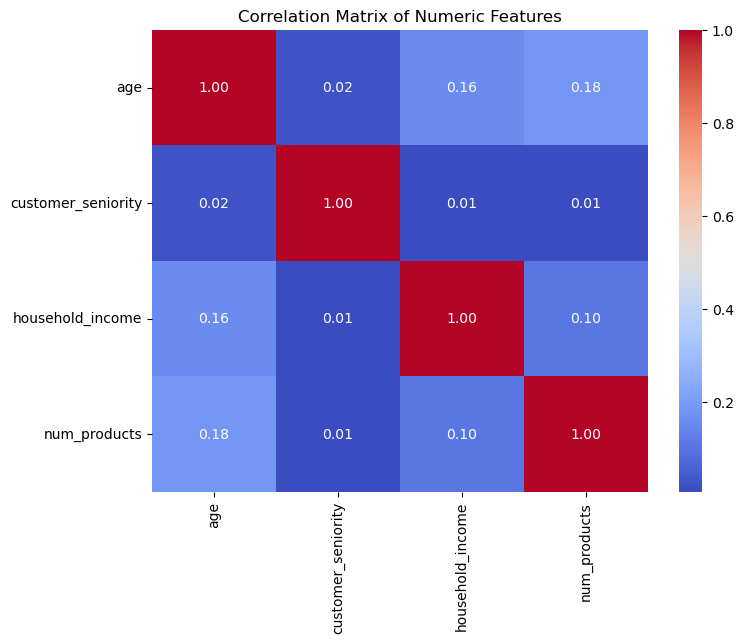

In [19]:
numeric_cols = ['age', 'customer_seniority', 'household_income']  # Corrected names

product_cols = [
    'savings_account', 'guarantees', 'current_account', 'derivada_account',
    'payroll_account', 'junior_account', 'mas_particular_account',
    'particular_account', 'particular_plus_account', 'short_term_deposit',
    'medium_term_deposit', 'long_term_deposit', 'e_account', 'funds',
    'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities',
    'home_account', 'salary', 'pension', 'direct_debit'
]

df['num_products'] = df[product_cols].sum(axis=1)

numeric_cols.append('num_products')

import seaborn as sns
import matplotlib.pyplot as plt

df_num = df[numeric_cols].compute().dropna()

# Correlation matrix
correlation_matrix = df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

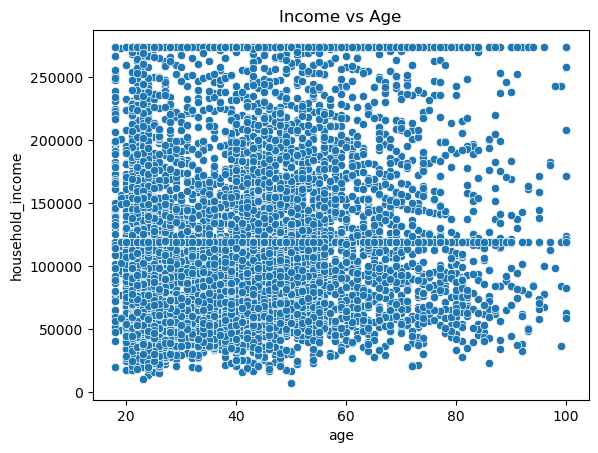

In [21]:
sns.scatterplot(data=df_num.sample(10000), x='age', y='household_income')
plt.title("Income vs Age")
plt.show()

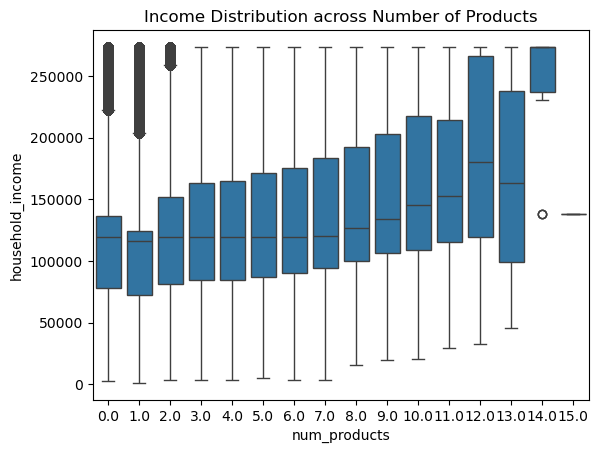

In [22]:
sns.boxplot(data=df_num, x='num_products', y='household_income')
plt.title("Income Distribution across Number of Products")
plt.show()